# Criando os nomes

In [109]:
import pandas as pd

In [110]:
nomes_m = pd.read_json("https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json")
nomes_f = pd.read_json("https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json")

In [111]:
nomes_m.sample()

,nome,regiao,freq,rank,sexo
48,RENATO,0,327610,49,M


In [112]:
frames = [nomes_m, nomes_f]

In [113]:
nomes = pd.concat(frames)['nome'].to_frame()

In [114]:
nomes.sample()

,nome
176,MARA


In [115]:
nomes

,nome
0,JOSE
1,JOAO
2,ANTONIO
3,FRANCISCO
4,CARLOS
...,...
195,ROSANE
196,IVONETE
197,LUCIANE
198,ISADORA


## Incluindo ID dos alunos

In [116]:
import numpy as np

In [117]:
np.random.seed(123)

In [118]:
total_alunos = len(nomes)
total_alunos

400

In [119]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [120]:
nomes

,nome,id_aluno
0,JOSE,235
1,JOAO,43
2,ANTONIO,304
3,FRANCISCO,156
4,CARLOS,343
...,...,...
195,ROSANE,231
196,IVONETE,99
197,LUCIANE,323
198,ISADORA,383


In [121]:
dominios = ["@gmail.com","@hotmail.com"]
nomes['dominio'] = np.random.choice(dominios, total_alunos)


In [122]:
nomes["email"] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [123]:
nomes

,nome,id_aluno,dominio,email
0,JOSE,235,@gmail.com,jose@gmail.com
1,JOAO,43,@hotmail.com,joao@hotmail.com
2,ANTONIO,304,@hotmail.com,antonio@hotmail.com
3,FRANCISCO,156,@hotmail.com,francisco@hotmail.com
4,CARLOS,343,@hotmail.com,carlos@hotmail.com
...,...,...,...,...
195,ROSANE,231,@gmail.com,rosane@gmail.com
196,IVONETE,99,@hotmail.com,ivonete@hotmail.com
197,LUCIANE,323,@gmail.com,luciane@gmail.com
198,ISADORA,383,@hotmail.com,isadora@hotmail.com


### Usando html

In [124]:
url = "http://tabela-cursos.herokuapp.com/index.html"
cursos = pd.read_html(url)

In [125]:
cursos = cursos[0]

In [126]:
cursos = cursos.rename(columns = {'Nome do curso': "nome_do_curso"})

In [127]:
cursos["id"] = cursos.index + 1

In [128]:
cursos = cursos.set_index("id")

In [129]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [130]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [131]:
nomes


,nome,id_aluno,dominio,email,matriculas
0,JOSE,235,@gmail.com,jose@gmail.com,3
1,JOAO,43,@hotmail.com,joao@hotmail.com,1
2,ANTONIO,304,@hotmail.com,antonio@hotmail.com,1
3,FRANCISCO,156,@hotmail.com,francisco@hotmail.com,3
4,CARLOS,343,@hotmail.com,carlos@hotmail.com,1
...,...,...,...,...,...
195,ROSANE,231,@gmail.com,rosane@gmail.com,1
196,IVONETE,99,@hotmail.com,ivonete@hotmail.com,1
197,LUCIANE,323,@gmail.com,luciane@gmail.com,1
198,ISADORA,383,@hotmail.com,isadora@hotmail.com,3


In [132]:
nomes.matriculas.describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [133]:
import seaborn as sns

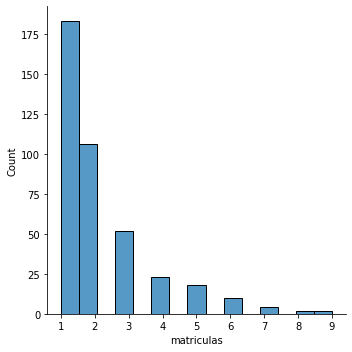

In [134]:
sns.displot(nomes.matriculas)

# Selecionando Cursos

In [135]:
nomes


,nome,id_aluno,dominio,email,matriculas
0,JOSE,235,@gmail.com,jose@gmail.com,3
1,JOAO,43,@hotmail.com,joao@hotmail.com,1
2,ANTONIO,304,@hotmail.com,antonio@hotmail.com,1
3,FRANCISCO,156,@hotmail.com,francisco@hotmail.com,3
4,CARLOS,343,@hotmail.com,carlos@hotmail.com,1
...,...,...,...,...,...
195,ROSANE,231,@gmail.com,rosane@gmail.com,1
196,IVONETE,99,@hotmail.com,ivonete@hotmail.com,1
197,LUCIANE,323,@gmail.com,luciane@gmail.com,1
198,ISADORA,383,@hotmail.com,isadora@hotmail.com,3


In [136]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [137]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id,np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [138]:
matriculas

,id_aluno,id_curso
0,235,11
1,235,11
2,235,2
3,43,13
4,304,10
...,...,...
850,323,13
851,383,9
852,383,6
853,383,19


In [139]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

In [140]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
141,NEIDE,159,@hotmail.com,neide@hotmail.com,3
86,CRISTINA,251,@gmail.com,cristina@gmail.com,4
124,LAIS,2,@gmail.com,lais@gmail.com,6


In [141]:
cursos.sample(3)

,nome_do_curso
id,
16,Estatística básica
12,Hardware básico
5,Cursos de Python


In [142]:
matriculas.sample(3)

,id_aluno,id_curso
236,189,19
608,41,20
687,320,10


In [143]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,8,Lógica de programação
2,81,Java para Web
3,18,C# para Web
4,17,Ruby on Rails
5,24,Cursos de Python
6,68,PHP com MySql
7,4,.NET para web
8,54,Novas integrações com Java
9,68,TDD com Java


In [144]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv')

# Criando o banco sql

In [145]:
from sqlalchemy import create_engine, MetaData, Table

In [146]:
engine = create_engine('sqlite:///:memory:')

In [147]:
engine

Engine(sqlite:///:memory:)

In [148]:
type(engine)

sqlalchemy.engine.base.Engine

In [149]:
print(engine.table_names())


[]


C:\Users\tiago\AppData\Local\Temp\ipykernel_9524\224578794.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


## Buscando do banco sql

In [150]:
matriculas

,id_aluno,id_curso
0,235,11
1,235,11
2,235,2
3,43,13
4,304,10
...,...,...
850,323,13
851,383,9
852,383,6
853,383,19


In [151]:
id_curso = 16

In [152]:
proxima_turma = matriculas.query(f"id_curso == {id_curso}")

In [153]:
proxima_turma

,id_aluno,id_curso
21,174,16
22,174,16
23,218,16
28,217,16
77,262,16
...,...,...
761,169,16
787,100,16
791,362,16
839,215,16


In [154]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
2,16,LAIS,@gmail.com,lais@gmail.com,6
5,16,JOSUE,@hotmail.com,josue@hotmail.com,1
6,16,ADAO,@hotmail.com,adao@hotmail.com,3
13,16,REINALDO,@hotmail.com,reinaldo@hotmail.com,4
19,16,BENEDITA,@gmail.com,benedita@gmail.com,1
...,...,...,...,...,...
358,16,LUCIANO,@hotmail.com,luciano@hotmail.com,3
362,16,REGIANE,@gmail.com,regiane@gmail.com,2
376,16,NAIR,@hotmail.com,nair@hotmail.com,1


In [155]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2          LAIS
5         JOSUE
6          ADAO
13     REINALDO
19     BENEDITA
         ...   
358     LUCIANO
362     REGIANE
376        NAIR
384      RAQUEL
397     ALISSON
Name: nome, Length: 71, dtype: object

In [156]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
2,LAIS
5,JOSUE
6,ADAO
13,REINALDO
19,BENEDITA
...,...
358,LUCIANO
362,REGIANE
376,NAIR


In [157]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [158]:
nome_curso = nome_curso.nome_do_curso

In [159]:
nome_curso

'Estatística básica'

In [160]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()


In [162]:
proxima_turma = proxima_turma.rename(columns = {"nome":f"Alunos do curso de {nome_curso}"})

In [163]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
2,LAIS
5,JOSUE
6,ADAO
13,REINALDO
19,BENEDITA
...,...
358,LUCIANO
362,REGIANE
376,NAIR


# Excel

In [164]:
proxima_turma.to_excel("proxima_turma.xlsx", index=False)